In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from pylab import mpl 

In [3]:
d1 = pd.read_csv("./data/process/SO206.csv",index_col=0)
d2 = pd.read_csv("./data/process/SO207.csv",index_col=0)
df = d1.append(d2)
df.index = pd.to_datetime(df.index)
df = df.sort_index()

In [20]:
def plot_temp_overview(df, alpha = 0.8,col = 'temp',title=u'特征1: temp'):
    '''
    df: DataFrame数据
    alpha: 设定线条的透明度，默认为0.8
    
    '''
    sns.set_style('darkgrid')
    plt.rcParams['font.family'] = 'SimHei' 
    plt.rcParams['font.size'] = 20
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=[20,8])
    plt.subplot(211)
    plt.plot(df['脱硫塔出口氧量'], alpha = alpha)
    plt.xticks(rotation=0)
    plt.ylabel('脱硫塔出口氧量')
    plt.subplot(212)
    plt.plot(df['脱硫塔出口SO2'], alpha = alpha)
    plt.xticks(rotation=0)
    plt.ylabel('脱硫塔出口SO2')
    return plt.show()

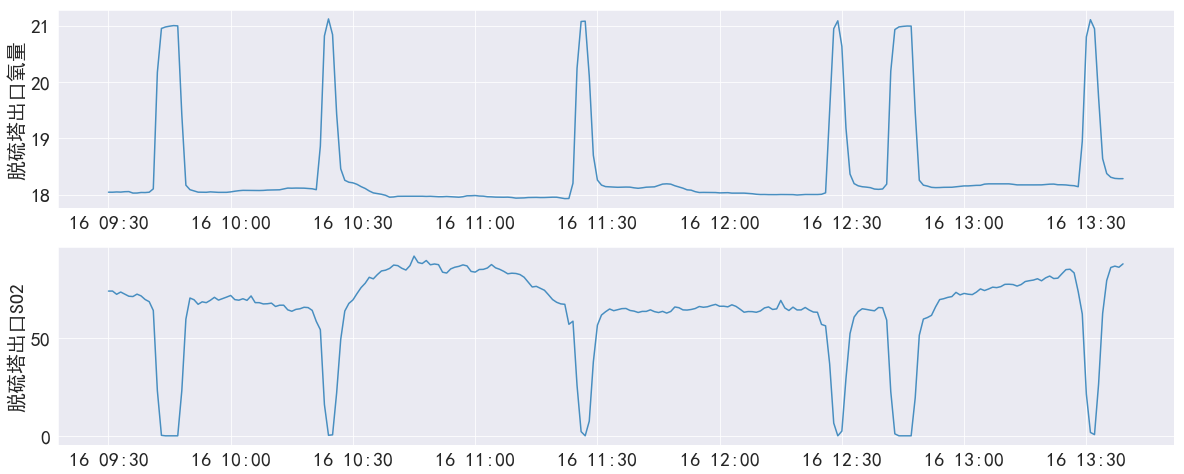

In [27]:
plot_temp_overview(df.iloc[3750:4000])

In [41]:
d1 = pd.read_csv("./data/process/SO2raw_06.csv",index_col=0)
d2 = pd.read_csv("./data/process/SO2raw_07.csv",index_col=0)
df = d1.append(d2)
df.index = pd.to_datetime(df.index)
df = df.sort_index()

In [48]:
def plot_temp_overview(df, alpha = 0.8,col = 'temp',title=u'特征1: temp'):
    '''
    df: DataFrame数据
    alpha: 设定线条的透明度，默认为0.8
    
    '''
    sns.set_style('darkgrid')
    plt.rcParams['font.family'] = 'SimHei' 
    plt.rcParams['font.size'] = 20
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=[20,2.5])
    plt.plot(df['脱硫塔出口SO2'], alpha = alpha)
    plt.xticks(rotation=0)
    plt.ylabel('脱硫塔出口SO2')
    return plt.show()

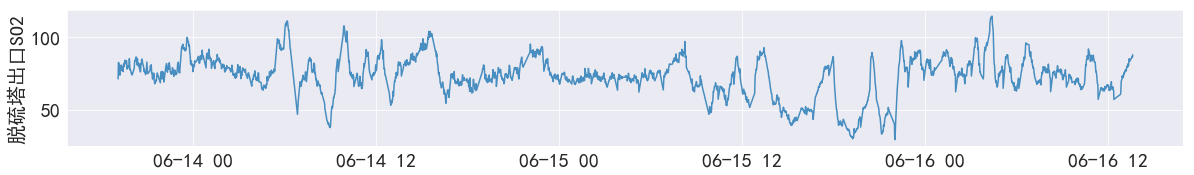

In [50]:
plot_temp_overview(df.iloc[5:4000])

In [2]:
d1 = pd.read_csv("./data/process/SO2label_06.csv",index_col=0)
d2 = pd.read_csv("./data/process/SO2label_07.csv",index_col=0)
df = d1.append(d2)
df.index = pd.to_datetime(df.index)
df['脱硫塔出口SO2'] =df['脱硫塔出口SO2']+98
df['index'] = df.index
df['date'] = df.index.date
df['month'] = df.index.strftime("%Y%m")
df['label'] = df['label'].astype(int).map({0:"正常状态",1:"异常状态"})
df = df.sort_index()

c:\users\demo\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [3]:
df.head()

,Logistic,iqr,label,q1,q3,rate,slope,value,脱硫塔出口SO2,index,date,month
time,,,,,,,,,,,,
2019-06-13 19:10:00,0.802479,27.513225,正常状态,-43.828242,-16.315017,0.6,4.069247,-0.156009,76.253970,2019-06-13 19:10:00,2019-06-13,201906
2019-06-13 19:11:00,0.734038,24.463980,正常状态,-40.980054,-16.516073,0.6,3.583235,-0.163893,77.527063,2019-06-13 19:11:00,2019-06-13,201906
2019-06-13 19:12:00,0.566897,21.414736,正常状态,-38.131866,-16.717130,0.6,3.048673,-0.200715,73.805460,2019-06-13 19:12:00,2019-06-13,201906
2019-06-13 19:13:00,0.481404,17.627596,正常状态,-35.283678,-17.656082,0.6,2.683932,-0.200715,75.848593,2019-06-13 19:13:00,2019-06-13,201906
2019-06-13 19:14:00,0.394973,13.840457,正常状态,-32.435490,-18.595033,0.6,2.418581,-0.201944,77.401713,2019-06-13 19:14:00,2019-06-13,201906


In [86]:
def plot_temp_overview(df, alpha = 0.8,col = 'temp',title=u'特征1: temp'):
    '''
    df: DataFrame数据
    alpha: 设定线条的透明度，默认为0.8
    
    '''
    sns.set_style('darkgrid')
    plt.rcParams['font.family'] = 'SimHei' 
    plt.rcParams['font.size'] = 20
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=[20,5])
    temp = df.pivot_table(index= "index",columns = 'label',values = '脱硫塔出口SO2')
    plt.plot(temp['正常状态'], label = '正常状态', alpha = alpha, color = 'green')
    plt.plot(temp['异常状态'], label = '异常状态', alpha = alpha, color = 'red')
    
    t = pd.Series([98,98],index = [df.index.min(),df.index.max()])
    plt.plot(t,":",color = 'blue',label = '预警阈值')    
    plt.xticks(rotation=20)
    plt.ylabel('')
    plt.legend(loc = 'upper left')
    return plt.show()

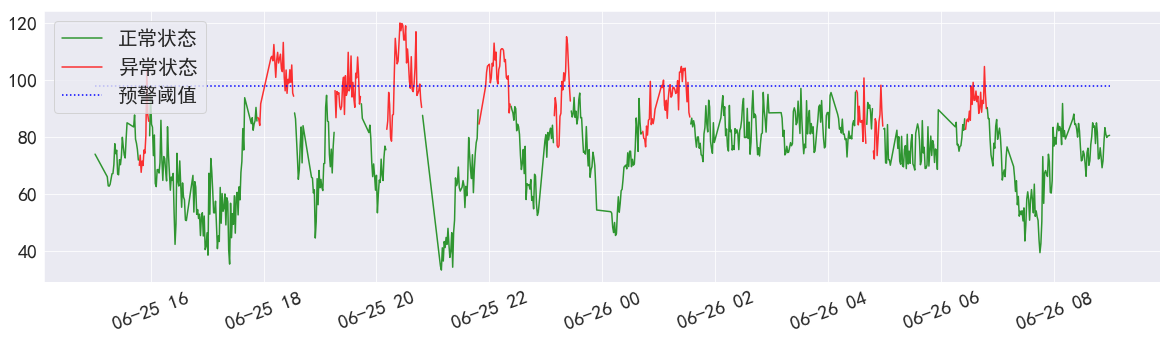

In [87]:
plot_temp_overview(df[(df.index>"2019-06-25 15:00:00")&(df.index<"2019-06-26 09:00:00")])

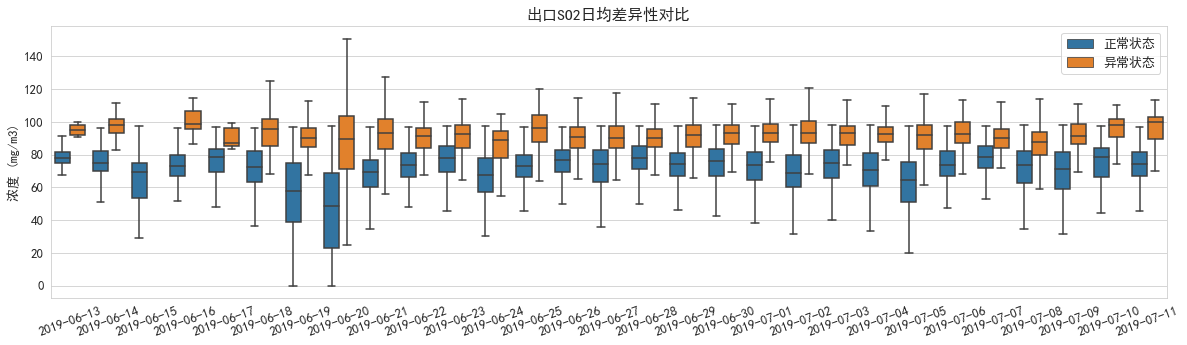

In [100]:
plt.figure(figsize=[20,5])
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'SimHei' 
plt.rcParams['font.size'] = 13
plt.rcParams['axes.unicode_minus'] = False
sns.boxplot(data = df.iloc[:40000],x= 'date',y = '脱硫塔出口SO2',hue='label',sym='')
plt.title('出口SO2日均差异性对比')
plt.xlabel('')
plt.xticks(rotation=20)
plt.ylabel(u'浓度 (mg/m3)')
plt.legend()

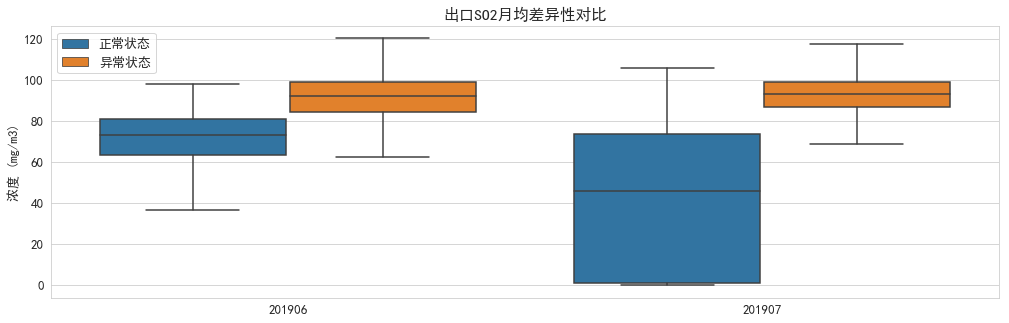

In [101]:
plt.figure(figsize=[17,5])
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'SimHei' 
plt.rcParams['font.size'] = 13
plt.rcParams['axes.unicode_minus'] = False
sns.boxplot(data = df,x= 'month',y = '脱硫塔出口SO2',hue='label',sym='')
plt.title('出口SO2月均差异性对比')
plt.xlabel('')
# plt.xticks(rotation=20)
plt.ylabel(u'浓度 (mg/m3)')
plt.legend()

Text(0, 0.5, '浓度 (mg/m3)')

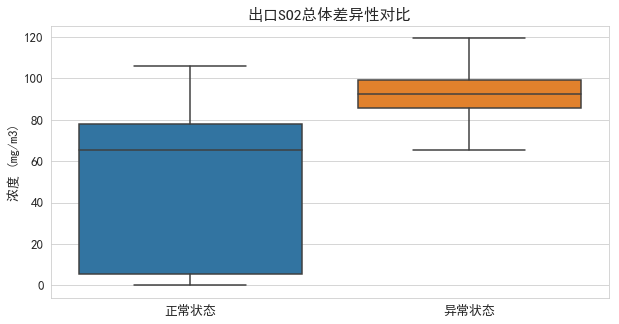

In [105]:
plt.figure(figsize=[10,5])
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'SimHei' 
plt.rcParams['font.size'] = 13
plt.rcParams['axes.unicode_minus'] = False
sns.boxplot(data = df,x= 'label',y = '脱硫塔出口SO2',sym='')
plt.title('出口SO2总体差异性对比')
plt.xlabel('')
# plt.xticks(rotation=20)
plt.ylabel(u'浓度 (mg/m3)')

In [16]:
def plot_temp_overview(df, alpha = 0.8,col = 'value',no=1):
    '''
    df: DataFrame数据
    alpha: 设定线条的透明度，默认为0.8
    
    '''
    sns.set_style('darkgrid')
    plt.rcParams['font.family'] = 'SimHei' 
    plt.rcParams['font.size'] = 20
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=[15,5])
    temp = df.pivot_table(index= "index",columns = 'label',values = col)
    plt.plot(temp['正常状态'], label = '正常状态', alpha = alpha, color = 'green')
    plt.plot(temp['异常状态'], label = '异常状态', alpha = alpha, color = 'red')
    
    t = pd.Series([0,0],index = [df.index.min(),df.index.max()])
    plt.plot(t,":",color = 'blue',label = '预警阈值')    
    plt.xticks(rotation=20)
    plt.ylabel('')
    plt.legend(loc = 'upper left')
    plt.title(u'特征%d: %s'%(no,col))
    return plt.show()

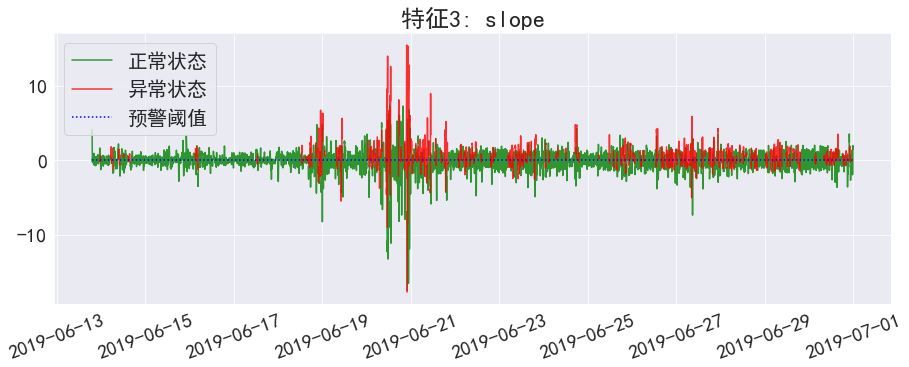

In [22]:
plot_temp_overview(df[df.index<"2019-07-01"],col='slope',no = 3)

In [36]:
def plot_temp_overview(df, alpha = 0.8,col = 'value'):
    '''
    df: DataFrame数据
    alpha: 设定线条的透明度，默认为0.8
    
    '''
    plt.figure(figsize=[20,5])
    sns.set_style('whitegrid')
    plt.rcParams['font.family'] = 'SimHei' 
    plt.rcParams['font.size'] = 13
    plt.rcParams['axes.unicode_minus'] = False
    plt.subplot(121)
    sns.boxplot(data = df,x= 'label',y = col,sym='')
    plt.title(u'特征 %s'%col)
    plt.xlabel('')
    plt.ylabel(u'浓度 (mg/m3)')
    plt.subplot(122)
    sns.distplot(a=df[df.label=='正常状态'][col],label='正常状态',bins=150)
    sns.distplot(a=df[df.label=='异常状态'][col],label='异常状态',bins=150)
    plt.xlabel('')
    plt.xlim(-5,5)
    plt.legend()
    return plt.show()

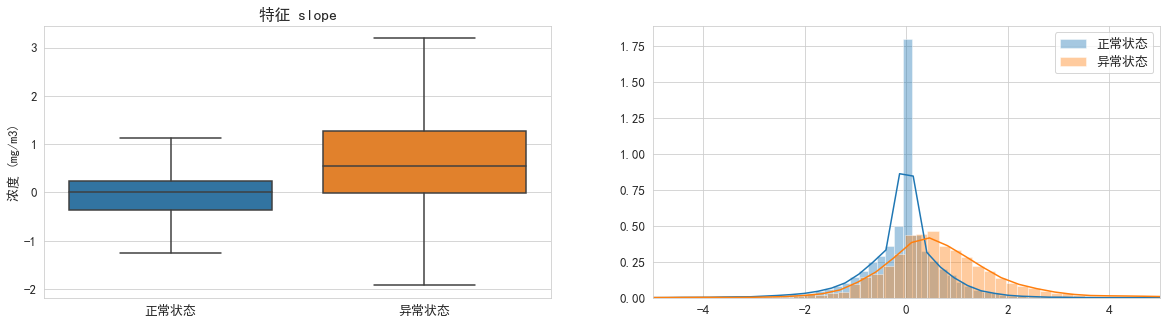

In [37]:
plot_temp_overview(df,col='slope')

In [50]:
df.head()

,Logistic,iqr,label,q1,q3,rate,slope,value,脱硫塔出口SO2,index,date,month
time,,,,,,,,,,,,
2019-06-13 19:10:00,0.802479,27.513225,正常状态,-43.828242,-16.315017,0.6,4.069247,-0.156009,76.253970,2019-06-13 19:10:00,2019-06-13,201906
2019-06-13 19:11:00,0.734038,24.463980,正常状态,-40.980054,-16.516073,0.6,3.583235,-0.163893,77.527063,2019-06-13 19:11:00,2019-06-13,201906
2019-06-13 19:12:00,0.566897,21.414736,正常状态,-38.131866,-16.717130,0.6,3.048673,-0.200715,73.805460,2019-06-13 19:12:00,2019-06-13,201906
2019-06-13 19:13:00,0.481404,17.627596,正常状态,-35.283678,-17.656082,0.6,2.683932,-0.200715,75.848593,2019-06-13 19:13:00,2019-06-13,201906
2019-06-13 19:14:00,0.394973,13.840457,正常状态,-32.435490,-18.595033,0.6,2.418581,-0.201944,77.401713,2019-06-13 19:14:00,2019-06-13,201906


In [43]:
def plot_temp_overview(df, alpha = 0.8,col = 'temp',title=u'特征1: temp'):
    '''
    df: DataFrame数据
    alpha: 设定线条的透明度，默认为0.8
    
    '''
    sns.set_style('darkgrid')
    plt.rcParams['font.family'] = 'SimHei' 
    plt.rcParams['font.size'] = 20
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=[20,5])
    plt.plot(df['label'], label = u'工况状态', alpha = alpha)
    plt.plot(df['Logistic'], label = u'异常风险值', alpha = alpha)
    t = pd.Series([0.6,0.6],index = [df.index.min(),df.index.max()])
    plt.plot(t,":",color = 'blue',label = '预警阈值')
    plt.xticks(rotation=20)
    plt.ylabel('')
    plt.legend(loc = 'upper left')
    return plt.show()

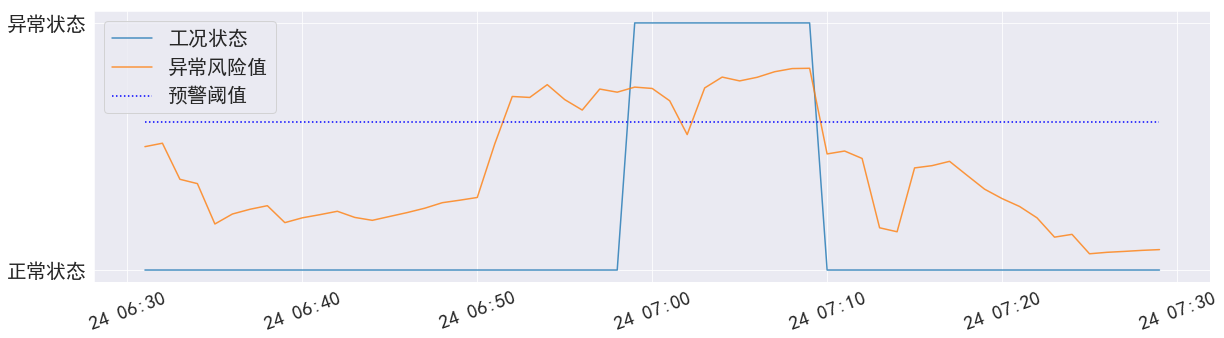

In [59]:
plot_temp_overview(df[(df.index<"2019-06-24 07:30")&(df.index>"2019-06-24 06:30")])